In [1]:
%pip install yfinance pandas_ta scikit-learn matplotlib seaborn



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:


import yfinance as yf

# equity = "BAJAJFINSV.NS"
equity = 'INFY.NS'

# equity = 'UNITEDPOLY.NS'


yfinancedf = yf.download(equity, interval="1m", period="7d")

# yfinancedf = yf.download(equity, start="2000-01-01")
yfinancedf.columns = yfinancedf.columns.get_level_values(0)

df = yfinancedf.copy()
df['Time'] = df.index


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
df.head(10)

Price,Close,High,Low,Open,Volume,Time
Datetime,,,,,,
2025-04-30 03:45:00+00:00,1500.000000,1501.300049,1495.000000,1496.099976,0,2025-04-30 03:45:00+00:00
2025-04-30 03:46:00+00:00,1499.000000,1501.800049,1498.199951,1500.400024,51215,2025-04-30 03:46:00+00:00
2025-04-30 03:47:00+00:00,1496.900024,1502.199951,1496.800049,1499.300049,53907,2025-04-30 03:47:00+00:00
2025-04-30 03:48:00+00:00,1497.099976,1498.300049,1496.199951,1496.699951,33321,2025-04-30 03:48:00+00:00
2025-04-30 03:49:00+00:00,1501.500000,1501.500000,1497.800049,1497.800049,36712,2025-04-30 03:49:00+00:00
2025-04-30 03:50:00+00:00,1505.000000,1505.000000,1502.500000,1502.500000,22659,2025-04-30 03:50:00+00:00
2025-04-30 03:51:00+00:00,1506.099976,1508.000000,1505.500000,1505.599976,40941,2025-04-30 03:51:00+00:00
2025-04-30 03:52:00+00:00,1506.500000,1507.000000,1505.500000,1506.900024,30846,2025-04-30 03:52:00+00:00
2025-04-30 03:53:00+00:00,1505.500000,1506.699951,1505.000000,1506.599976,24777,2025-04-30 03:53:00+00:00


In [4]:

import numpy as np
import pandas_ta as ta

# Calculating the features

df['rsi'] = ta.rsi(close=df['Close'], length=14)
df['sma'] = ta.sma(close=df['Close'], length=20)

# Perccentage change of closing price from it's 20 period mean.
df['sma_deviation'] = (df['Close'] - df['sma']) / df['sma']
df['slope'] = (df['Close'] - df['Close'].shift(10)) / 10
df['logreturn'] = np.log(df['Close'] / df['Close'].shift(10))
df['logvolume'] = np.log(df['Volume'].replace(0, np.nan))
df['logvolume_mean'] = df['logvolume'].rolling(window=10).mean()
df['logvolume_std'] = df['logvolume'].rolling(window=10).std()

# Computing volume z score, how far log volume is from it's mean in terms of std deviation.
df['volume_zscore'] = (df['logvolume'] - df['logvolume_mean']) / df['logvolume_std']

# Close column would be used to calculate future returns for training & test data. Taking 10 units of return
df['future_return'] = (df['Close'].shift(-10) / df['Close']) - 1


df = df[['rsi', 'sma_deviation', 'slope', 'logreturn', 'volume_zscore', 'future_return', 'Close']]

df = df.dropna()
df.head(10)

Price,rsi,sma_deviation,slope,logreturn,volume_zscore,future_return,Close
Datetime,,,,,,,
2025-04-30 04:04:00+00:00,44.540696,-0.001475,-0.550000,-0.003660,0.307814,-0.000533,1499.800049
2025-04-30 04:05:00+00:00,44.540696,-0.001468,-0.289990,-0.001932,-0.142597,-0.000533,1499.800049
2025-04-30 04:06:00+00:00,47.524901,-0.000925,0.150000,0.001000,-1.979327,-0.000466,1500.699951
2025-04-30 04:07:00+00:00,45.475221,-0.001494,0.100000,0.000667,-0.969522,-0.000333,1500.000000
2025-04-30 04:08:00+00:00,44.587479,-0.001781,-0.270007,-0.001799,0.299870,0.000734,1499.699951
2025-04-30 04:09:00+00:00,46.823354,-0.001341,-0.139990,-0.000933,-0.877704,0.000133,1500.300049
2025-04-30 04:10:00+00:00,43.079802,-0.001944,-0.559998,-0.003729,-0.418504,0.000734,1499.099976
2025-04-30 04:11:00+00:00,44.667845,-0.001458,-0.359998,-0.002398,-1.017361,0.000133,1499.500000
2025-04-30 04:12:00+00:00,46.670613,-0.000909,-0.359998,-0.002397,-1.909670,0.000200,1500.000000


In [5]:
len(df)

2536

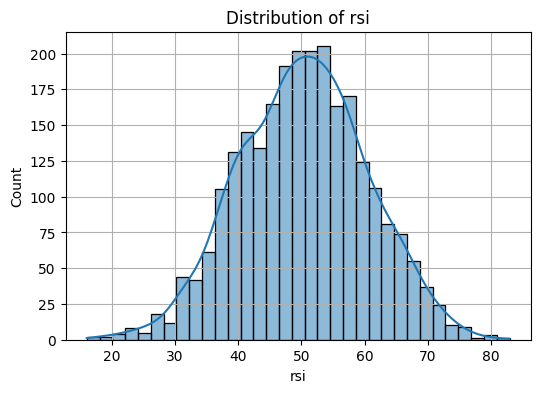

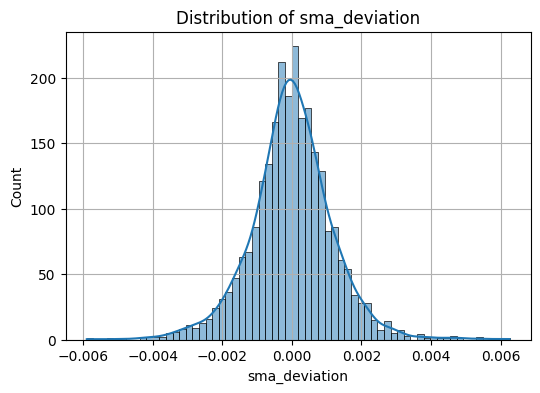

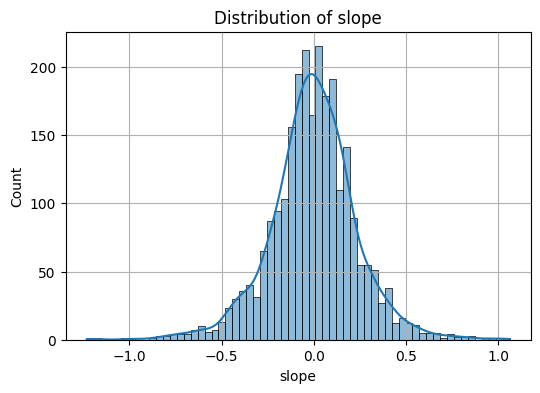

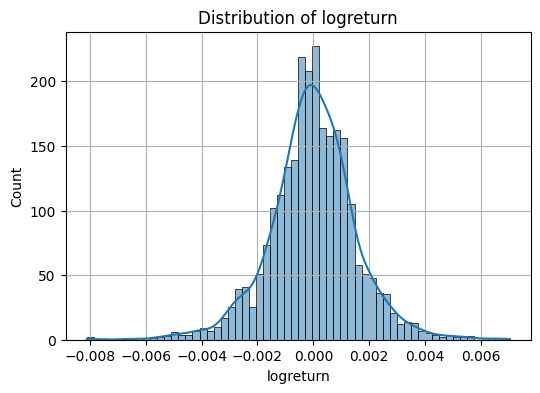

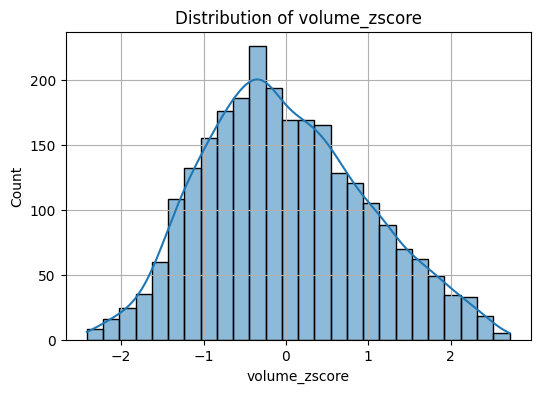

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in ['rsi', 'sma_deviation', 'slope', 'logreturn', 'volume_zscore']:
  plt.figure(figsize=(6, 4))
  sns.histplot(df[col], kde=True)
  plt.title(f'Distribution of {col}')
  plt.grid(True)
  plt.show()


In [7]:
# Defining Market Regimes

bull_threshold = 0.002
bear_threshold = -0.002

"""
df['regime'] = np.select(
  [
    df['future_return'] > bull_threshold,
    df['future_return'] < bear_threshold
  ],
  ['bull', 'bear'],
  default='side'
)
"""

df['regime'] = np.select(
  [
    df['future_return'] > bull_threshold,
  ],
  ['bull'],
  default='side'
)

df.head(10)


Price,rsi,sma_deviation,slope,logreturn,volume_zscore,future_return,Close,regime
Datetime,,,,,,,,
2025-04-30 04:04:00+00:00,44.540696,-0.001475,-0.550000,-0.003660,0.307814,-0.000533,1499.800049,side
2025-04-30 04:05:00+00:00,44.540696,-0.001468,-0.289990,-0.001932,-0.142597,-0.000533,1499.800049,side
2025-04-30 04:06:00+00:00,47.524901,-0.000925,0.150000,0.001000,-1.979327,-0.000466,1500.699951,side
2025-04-30 04:07:00+00:00,45.475221,-0.001494,0.100000,0.000667,-0.969522,-0.000333,1500.000000,side
2025-04-30 04:08:00+00:00,44.587479,-0.001781,-0.270007,-0.001799,0.299870,0.000734,1499.699951,side
2025-04-30 04:09:00+00:00,46.823354,-0.001341,-0.139990,-0.000933,-0.877704,0.000133,1500.300049,side
2025-04-30 04:10:00+00:00,43.079802,-0.001944,-0.559998,-0.003729,-0.418504,0.000734,1499.099976,side
2025-04-30 04:11:00+00:00,44.667845,-0.001458,-0.359998,-0.002398,-1.017361,0.000133,1499.500000,side
2025-04-30 04:12:00+00:00,46.670613,-0.000909,-0.359998,-0.002397,-1.909670,0.000200,1500.000000,side


In [8]:
# Checking class distribution


# Choose only those assets in which there is enough data for all the classes in which we are trying to classify (~20% or more)
# Features should be normally distributed

df['regime'].value_counts(normalize=True)


regime
side    0.917587
bull    0.082413
Name: proportion, dtype: float64

In [9]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

features = ['rsi', 'slope', 'logreturn', 'volume_zscore']

split_idx = int(len(df) * 0.8)
X_train = df.iloc[:split_idx][features]
y_train = df.iloc[:split_idx]['regime']
X_test = df.iloc[split_idx:][features]
y_test = df.iloc[split_idx:]['regime']

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

        bull       0.14      0.04      0.06        50
        side       0.90      0.97      0.94       458

    accuracy                           0.88       508
   macro avg       0.52      0.51      0.50       508
weighted avg       0.83      0.88      0.85       508



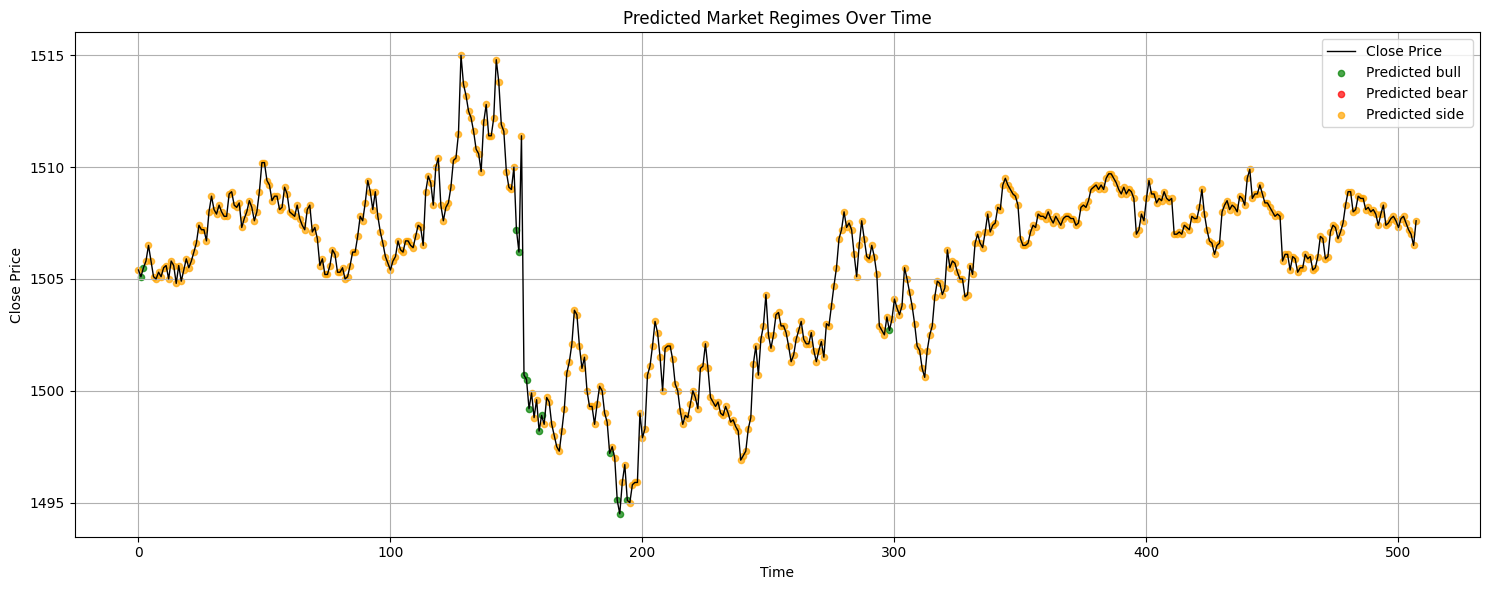

In [10]:


# Visualization

df_test = df.iloc[split_idx:].copy()
df_test['predicted_regime'] = y_pred

df_test = df_test.reset_index(drop=True)

plt.figure(figsize=(15, 6))
plt.plot(df_test.index, df_test['Close'], label='Close Price', color='black', linewidth=1)

colors = {'bull': 'green', 'bear': 'red', 'side': 'orange'}
for regime in ['bull', 'bear', 'side']:
  idx = df_test[df_test['predicted_regime'] == regime].index
  plt.scatter(idx, df_test.loc[idx, 'Close'], color=colors[regime], label=f'Predicted {regime}', s=20, alpha=0.7)

plt.title('Predicted Market Regimes Over Time')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
from sklearn.metrics import confusion_matrix
import pandas as pd

# Compute confusion matrix
# labels = ['bull', 'bear', 'side']
labels = ['bull', 'side']
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Display as a labeled DataFrame
confusion_df = pd.DataFrame(cm, index=[f"Actual_{l}" for l in labels], columns=[f"Pred_{l}" for l in labels])

# Print confusion matrix
print(confusion_df)

# Compute precision, recall, F1-score
print("\nClassification Report:")
print(classification_report(y_test, y_pred, labels=labels, digits=3))

             Pred_bull  Pred_side
Actual_bull          2         48
Actual_side         12        446

Classification Report:
              precision    recall  f1-score   support

        bull      0.143     0.040     0.062        50
        side      0.903     0.974     0.937       458

    accuracy                          0.882       508
   macro avg      0.523     0.507     0.500       508
weighted avg      0.828     0.882     0.851       508



/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/lib/python3.10/site-package

<Figure size 800x500 with 0 Axes>

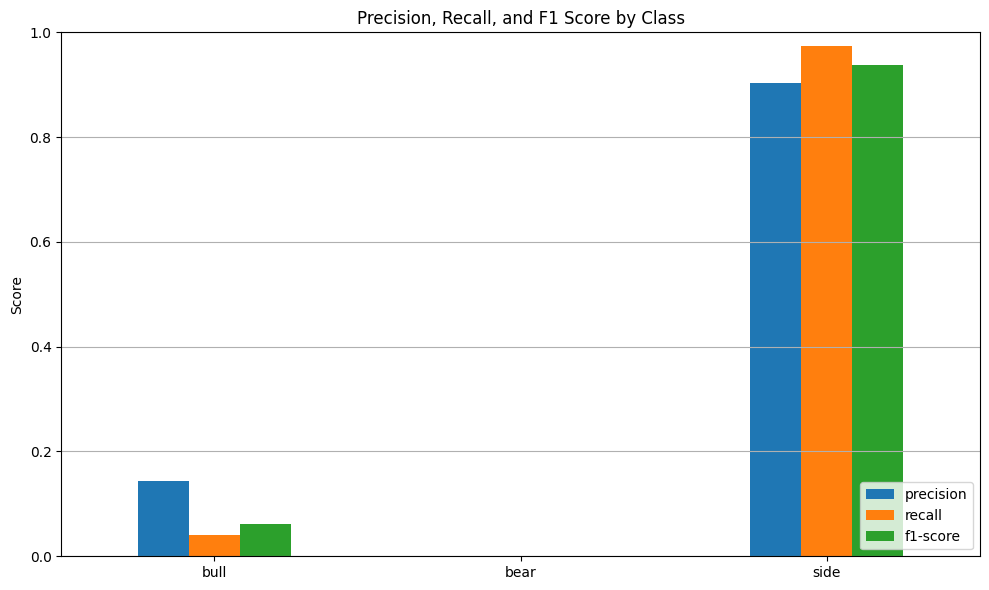

In [12]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Get classification report as dict
report = classification_report(y_test, y_pred, labels=['bull', 'bear', 'side'], output_dict=True)

# Convert to DataFrame for easy plotting
metrics_df = pd.DataFrame(report).transpose()
metrics_df = metrics_df.loc[['bull', 'bear', 'side'], ['precision', 'recall', 'f1-score']]

# Plotting
plt.figure(figsize=(8, 5))
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title("Precision, Recall, and F1 Score by Class")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
